In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [18]:
diabetes = load_diabetes()

#입력 변수를 표 형태로 보기 좋게 변환
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# 환자의 질병 진행도 수치를 series형태로 만들고 이름을 변경
y = pd.Series(diabetes.target, name='disease_progression')

df = pd.concat([X, y], axis=1)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

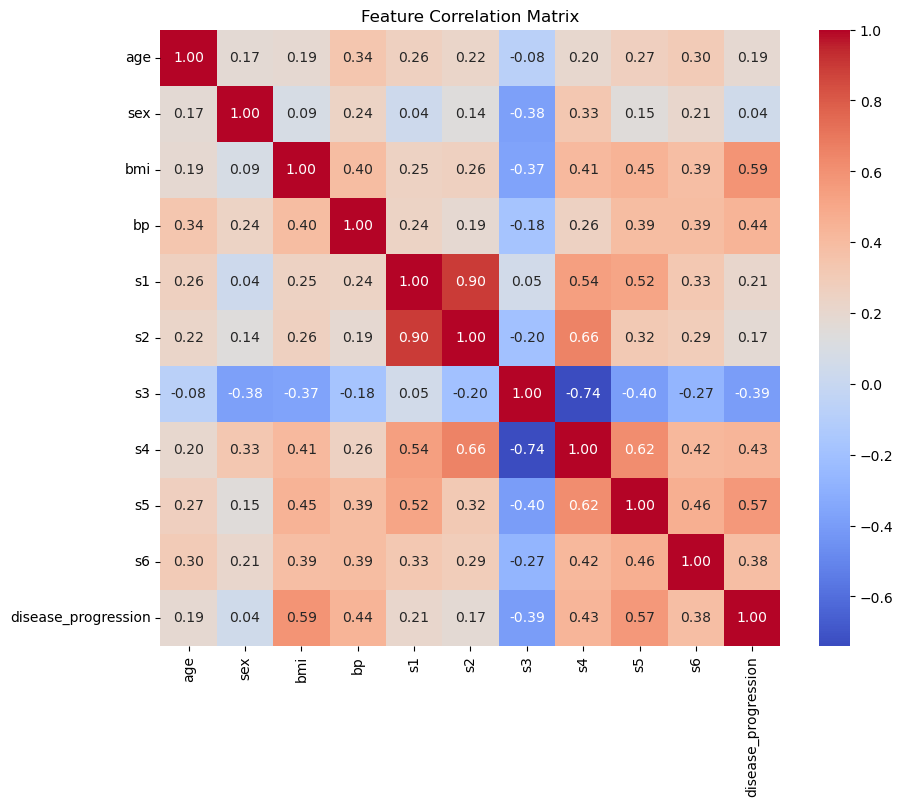

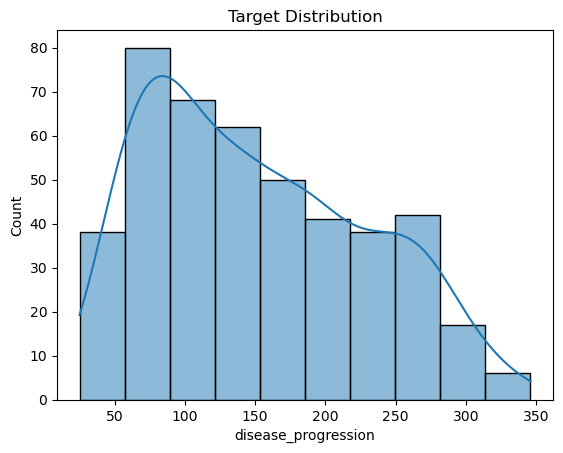

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

sns.histplot(df['disease_progression'], kde=True)
plt.title('Target Distribution')
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R^2):",r2)

Mean Squared Error: 2900.1936284934804
R-squared (R^2): 0.4526027629719196


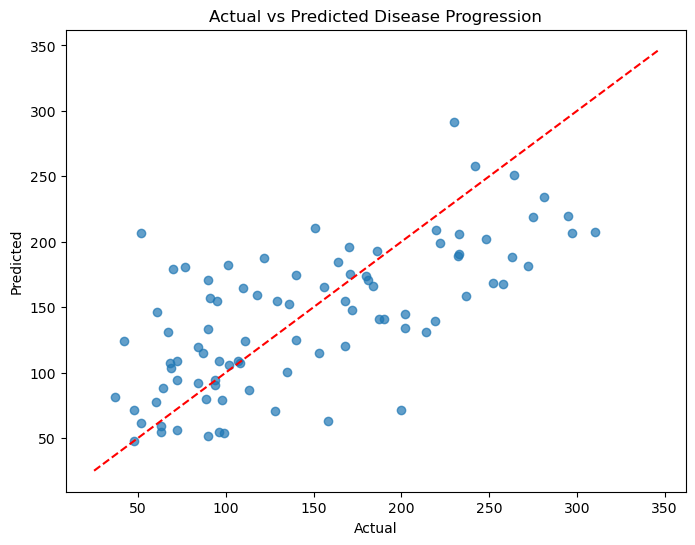

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # y = x 라인
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Disease Progression")
plt.show()

  Feature  Coefficient
8      s5   736.198859
2     bmi   542.428759
5      s2   518.062277
3      bp   347.703844
7      s4   275.317902
6      s3   163.419983
9      s6    48.670657
0     age    37.904021
1     sex  -241.964362
4      s1  -931.488846


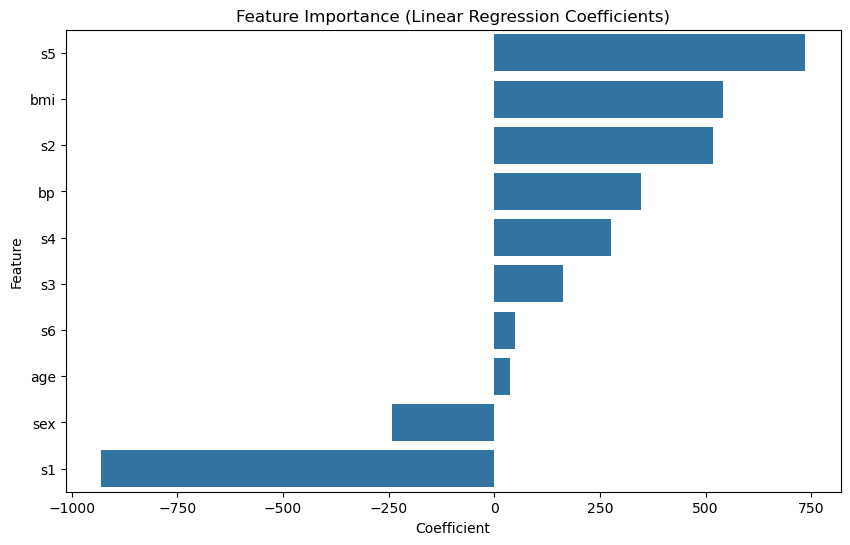

In [27]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coeff_df)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coeff_df)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()
